In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from matplotlib import cm

In [ ]:
def g_x(x,y,u,sigma,w):   
    return  -np.log(2*np.pi)-0.5*np.log(np.linalg.det(sigma))-0.5*(np.dot(np.dot(np.transpose([x,y]-u),np.linalg.inv(sigma)),([x,y]-u)))+np.log(w)


In [ ]:
df_train = pd.read_csv('test.txt', sep=",", header = None)
df_train = pd.DataFrame(df_train.values, columns = ['X', 'Y'])

df=df_train.values;

In [ ]:
u1=np.array([0,0])
sigma1=np.matrix([[.25 ,.3],[.3 ,1]])

In [ ]:
u2=np.array([2,2])
sigma2=np.matrix([[.5 ,0],[0 ,.5]])

In [ ]:
w1=np.empty(shape=[0,2])
w2=np.empty(shape=[0, 2])

In [ ]:
for i in range(0,df.shape[0]):
    gx1=g_x(df[i,0],df[i,1],u1,sigma1,0.5);
    gx2 = g_x(df[i,0],df[i,1], u2, sigma2, 0.5);
    if(gx1>gx2):
        w1 = np.append(w1,np.array([df[i, :]]), axis=0)
    else:
        w2 = np.append(w2, np.array([df[i, :]]), axis=0)


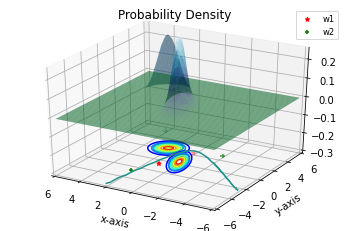

In [ ]:
fig = plt.figure()
ax =fig.add_subplot(projection='3d')

ax.set_xlim3d(6,-6)
ax.set_ylim3d(-6,6)
ax.set_zlim3d(-0.3,0.25)

ax.scatter3D(w1[:,0],w1[:,1],[-0.3,-.3,-.3], color='red',marker='*',label='w1')
ax.scatter3D(w2[:,0],w2[:,1],[-.3,-.3,-.3], color='green',marker='+',label='w2')

xx, yy = np.mgrid[-6:6:0.2, -6:6:0.2]
pos = np.dstack((xx, yy))

rv = multivariate_normal(u2,sigma2)
z1=rv.pdf(pos)

ax.plot_surface(xx,yy,rv.pdf(pos),rstride=1, cstride=1,alpha=0.35)
ax.contour(xx,yy,z1,zdir='-z',offset=-.3,cmap='jet')

rv=multivariate_normal(u1,sigma1)
z2=rv.pdf(pos)
#coolwarm
ax.plot_surface(xx, yy,rv.pdf(pos),rstride=1, cstride=1,alpha=0.35, cmap=cm.ocean)
ax.contour(xx, yy, rv.pdf(pos), zdir='-z',offset=-.3,cmap='jet')


ax.contour(xx, yy, z1-z2, zdir='-z',offset=-.3)

plt.title('Probability Density')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend(loc="best",fontsize="small")


plt.show();